In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## 1. 
**Importeer de dataset Honda.csv**

In [4]:
df = pd.read_csv('Honda.csv')

## 2. 
**a. Inspecteer de waarde Massa.ledig.voertuig middels een histogram. Zijn er waardes die als
outlier gezien kunnen worden? Verwijder deze. Doe hetzelfde voor de variabele
Massa.rijklaar** <br>
Video data inspecteren op outliers: https://youtu.be/Gxlco3CCR9I

In [5]:
df

,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Vervaldatum.APK,Datum_tenaamstelling,Bruto.BPM,Inrichting,Aantal.zitplaatsen,Eerste.kleur,Tweede.kleur,Aantal.cilinders,Cilinderinhoud,Massa.ledig.voertuig,Toegestane.maximum.massa.voertuig,Massa.rijklaar,Maximum.massa.trekken.ongeremd,Maximum.trekken.massa.geremd,Zuinigheidslabel,Datum.eerste.toelating,Datum.eerste.afgifte.Nederland,Wacht.op.keuren,Catalogusprijs,WAM.verzekerd,Maximale.constructiesnelheid..brom.snorfiets.,Laadvermogen,Oplegger.geremd,Aanhangwagen.autonoom.geremd,Aanhangwagen.middenas.geremd,Vermogen..brom.snorfiets.,Aantal.staanplaatsen,Aantal.deuren,Aantal.wielen,Afstand.hart.koppeling.tot.achterzijde.voertuig,Afstand.voorzijde.voertuig.tot.hart.koppeling,Afwijkende.maximum.snelheid,Lengte,Breedte,Europese.voertuigcategorie,Europese.voertuigcategorie.toevoeging,Europese.uitvoeringcategorie.toevoeging,Plaats.chassisnummer,Technische.max..massa.voertuig,Type,Type.gasinstallatie,Typegoedkeuringsnummer,Variant,Uitvoering,Volgnummer.wijziging.EU.typegoedkeuring,Vermogen.massarijklaar,Wielbasis,Export.indicator,Openstaande.terugroepactie.indicator,Vervaldatum.tachograaf,Taxi.indicator,Maximum.massa.samenstelling,Aantal.rolstoelplaatsen,Maximum.ondersteunende.snelheid,API.Gekentekende_voertuigen_assen,API.Gekentekende_voertuigen_brandstof,API.Gekentekende_voertuigen_carrosserie,API.Gekentekende_voertuigen_carrosserie_specifiek,API.Gekentekende_voertuigen_voertuigklasse
0,MN84HV,Motorfiets,HONDA,VT 500 C,NaN,20200612.0,NaN,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,491.0,179.0,NaN,186.0,NaN,NaN,NaN,19830630,19920530,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.20,149.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
1,XR0428,Motorfiets,HONDA,CB750F,NaN,20200923.0,NaN,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,736.0,246.0,NaN,253.0,NaN,NaN,NaN,19760706,19760706,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
2,MR56TD,Motorfiets,HONDA,NTV 650,NaN,20190813.0,644.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,647.0,211.0,NaN,218.0,NaN,NaN,NaN,19930525,19930525,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Ja,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
3,43MLXT,Motorfiets,HONDA,HONDA GL1800,NaN,20200901.0,3916.0,Niet geregistreerd,2.0,N.v.t.,N.v.t.,6.0,1832.0,353.0,NaN,360.0,NaN,NaN,NaN,20010915,20200615,Geen verstrekking in Open Data,NaN,Nee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,L3,NaN,NaN,r.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,169.0,Nee,Nee,NaN,Nee,NaN,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
4,MDXD06,Motorfiets,HONDA,RC44,NaN,20200729.0,1153.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,745.0,239.0,426.0,246.0,NaN,NaN,NaN,20020306,20020306,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balho

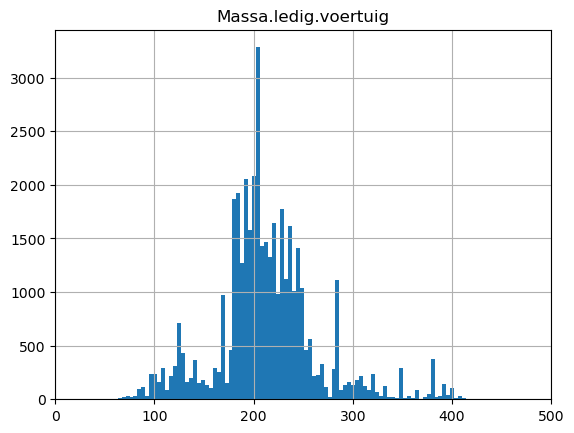

In [9]:
df.hist('Massa.ledig.voertuig', bins = 1000)
plt.xlim(0, 500)
plt.show()

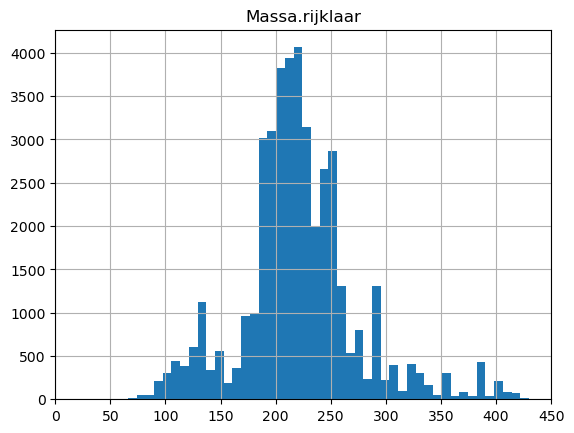

In [28]:
df.hist('Massa.rijklaar', bins = 500)
plt.xlim(0, 450)
plt.show()

**b. Inspecteer waardes middels een 2-d plot voor de variabelen massa.ledig.voertuig en
massa.rijklaar . Welke additionele waarde zou je nog kunnen verwijderen?**

## 3. 
**a. Zet de variabele Datum_tenaamstelling in Date format om.**
Video: https://www.youtube.com/watch?v=4WLtGZ-mbjc&list=PLwkTCAI_gJjW10xaAJpdqeQx7EQgFolfG&index=13 

In [27]:
pd.to_datetime(df['Datum_tenaamstelling'], format = %-%m-%d)

SyntaxError: invalid syntax (1797983364.py, line 1)

## 4. 
**Controleer of er NA-waardes in de variabele Bruto.BPM zitten.** <br>
Video behandelen missing data: https://youtu.be/Gxlco3CCR9I?t=502 <br>

**a. Maak een nieuwe variabele flag, die 1 is indien Bruto.BPM een NA-waarde bevat, en 0 wanneer er input is.**

**b. Vul de NA-waardes in met**

i. Gemiddelde van de waarde

ii. Mediaan van de waarde 

iii. Interpolatie van bovenstaande onderstaande waarde

## 5. 
**a. Maak een nieuwe dataset met per unieke waarde voor de variabele Handelsbenaming het
aantal keren dat deze voorkomt. Welke benaming komt het vaakste voor? **

**b. Selecteer uit het oorspronkelijke dataframe alleen de rijen waarin de string “CBR 600” voorkomt in de Handelsbenaming. Kies ervoor om zowel hoofd als kleine letters toe te laten**

Tip: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html

**c. Vervang de waardes in de nieuwe dataset die heel erg lijken (maximaal verschil van 20%
waardes) op de meest voorkomende waarde.** <br>
Tip: Gebruik fuzz.ratio uit fuzzywuzzy <br>
Tip2: om fuzz.ratio toe te kunnen passen op een kolom moet je gebruik maken van de apply functie

Video fuzzywuzzy: https://www.youtube.com/watch?v=aE2AwoBxXeU&list=PLwkTCAI_gJjW10xaAJpdqeQx7EQgFolfG&index=19 <br>
Video apply: https://www.youtube.com/watch?v=eYVD3q15tsA&list=PLwkTCAI_gJjW10xaAJpdqeQx7EQgFolfG&index=18

In [ ]:
#!pip install fuzzywuzzy
#of
#!conda install -c conda-forge fuzzywuzzy
